# Results Exploration

Visualizations of results for Title I simulations.

In [5]:
from dp_policy.experiments import titlei_funding as funding, titlei_grid as test_params
from dp_policy.titlei.allocators import AbowdAllocator, SonnenbergAuthorizer
from dp_policy.titlei.utils import weighting
from dp_policy.titlei.mechanisms import Laplace, Gaussian, GroundTruth
from dp_policy.titlei.utils import *
from dp_policy.titlei.thresholders import *
from dp_policy.titlei.evaluation import *
from dp_policy.experiments import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

saipe = get_inputs(2021)
sppe = get_sppe("../data/sppe18.xlsx")
print(saipe.shape)

plt.style.use('seaborn-deep')

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/steed/dp-policy
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
(13190, 25)
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Replicating Title I

### Data
State per-pupil expenditure from NCES.

In [3]:
sppe = get_sppe("../data/sppe18.xlsx")
sppe.head()

,state,ppe,abbrv
0,Alabama,9697,AL
1,Alaska,17726,AK
2,American Samoa,NaN,AS
3,Arizona,8296,AZ
4,Arkansas,10072,AR


Census Small Area Poverty Estimates.

In [62]:
saipe.head()

State Postal Code                         Name  \
State FIPS Code District ID                                                  
1               1                          AL  Fort Rucker School District   
                1                          AL  Fort Rucker School District   
                1                          AL  Fort Rucker School District   
                1                          AL  Fort Rucker School District   
                1                          AL  Fort Rucker School District   

                             Estimated Total Population  \
State FIPS Code District ID                               
1               1                                  4547   
                1                                  4547   
                1                                  4547   
                1                                  4547   
                1                                  4547   

                             Estimated Population 5-17  \
State FIPS Code District ID                              
1               1                                  861   
                1                                  861   
                1                                  861   
                1                                  861   
                1                                  861   

                             Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder  \
State FIPS Code District ID                                                                                                          
1               1                                                          133                                                       
                1                                                          133                                                       
                1                                                          133                                                       
                1                                                          133                                                       
                1                                                          133                                                       

                               cv     LEAID  Sort C    State  \
State FIPS Code District ID                                    
1               1            0.42  100001.0     1.0  ALABAMA   
                1            0.42  100003.0     1.0  ALABAMA   
                1            0.42  100005.0     1.0  ALABAMA   
                1            0.42  100006.0     1.0  ALABAMA   
                1            0.42  100007.0     1.0  ALABAMA   

                             Basic Hold Harmless  ...  \
State FIPS Code District ID                       ...   
1               1                   6.145069e+04  ...   
                1                   2.085941e+04  ...   
                1                   8.205345e+05  ...   
                1                   1.319212e+06  ...   
                1                   6.089449e+05  ...   

                             Hold Harmless Percentage  Resident Pop.  \
State FIPS Code District ID                                            
1               1                            1.505202         4547.0   
                1                            0.850000         2482.0   
                1                            0.900000        22051.0   
                1                            0.901848        49087.0   
                1                            0.936605        83044.0   

                             Total Formula Count  5-17 Pop.  Percent Formula  \
State FIPS Code District ID                                                    
1               1                          135.0      861.0         0.156794   
                1                           27.0      243.0         0.111111   
                1                          971.

In [2]:
# average school district student pop
print(saipe["Estimated Population 5-17"].mean())
print(saipe["Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder"].mean())

4050.7129304313044
626.114253222138


### Allocating funds

Next, a class for the different ways we might allocate funds based on the poverty estimates (e.g. Abowd's shortcut method vs. the full Sonnenberg method vs. the Sonnenberg method without renormalization below).

-- WARNING: dropping some balances from total budget --
Puerto Rico 413911155.7939328
County balances 728460.8149536257
Part D Subpart 2 98548579.79236995
15836763981.599205


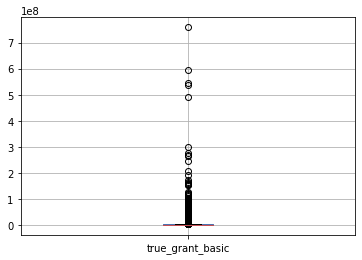

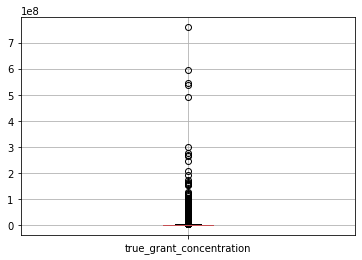

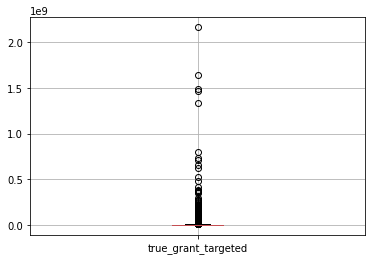

In [236]:
# Test with ground truth mechanism
saipe = get_inputs(2021)
grants = funding(SonnenbergAuthorizer, saipe, GroundTruth(), get_sppe("../data/sppe18.xlsx"))
grants.boxplot('true_grant_basic')
plt.show()
grants.boxplot('true_grant_concentration')
plt.show()
grants.boxplot('true_grant_targeted')
plt.show()

## Ground Truth Comparison
How close are our allocation estimates to the actual allocations from 2019?

/Users/steed/dp-policy
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
total
State level error State FIPS Code
1     6.910050e+07
2     1.727093e+07
4     8.954219e+07
5     4.526321e+07
6     5.648967e+08
8     4.836872e+07
9     4.272197e+07
10    1.698622e+07
11    1.608756e+07
12    2.209907e+08
13    1.325106e+08
15    1.554488e+07
16    1.639109e+07
17    1.592521e+08
18    6.713091e+07
19    2.982481e+07
20    2.532719e+07
21    7.428141e+07
22    8.766432e+07
23    1.761418e+07
24    8.102885e+07
25    6.772895e+07
26    1.291163e+08
27    4.826552e+07
28    5.958592e+07
29    6.625734e+07
30    1.662187e+07
31    1.805842e+07
32    3.440820e+07
33    1.513068e+07
34    9.612916e+07
35    3.381221e+07
36    2.877003e+08
37    1.281273e+08
38    1.778415e+07
39    1.531544e+08
40    5.285914e+07
41    4.251288e+07
42    1.762226

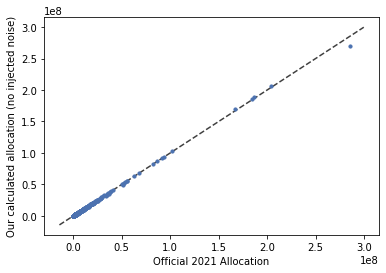

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
                14550             Fresno Unified School District   
36              82047                               Kings County   
11              30           District of Columbia Public Schools   
36              82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
                14550                        2.120322e+07   
36              82047                        8.827453e+07   
11              30                           1.774410e+07   
36              82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
                14550                                5.241393e+06   
36              82047                                2.182134e+07   
11              30                                   4.229167e+06   
36              82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
                14550                           1.861120e+07   
36              82047                           9.270965e+07   
11              30                              1.444236e+07   
36              82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
                14550                       1.813083e+07   
36              82047                       8.319514e+07   
11              30                          1.405369e+07   
36              82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
                14550                        6.318665e+07   
36              82047                        2.860007e+08   
11              30                           5.046931e+07   
36              82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
                14550                2.379983e+07   
36              82047                8.712931e+07   
11              30                   1.774410e+07   
36              82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
                14550                        6.039204e+06   
36              82047                        2.210905e+07   
11              30                           3.806250e+06   
36              82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
                14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
11              30                      1.371071e+07         1.360056e+07   
36              82024                   8.625801e+07         7.837469e+07   

                             ... 

basic
State level error State FIPS Code
1    -9.059529e+05
2     1.678302e+06
4    -1.472287e+06
5    -5.308251e+05
6     3.508586e+07
8     3.408538e+06
9    -7.503860e+05
10   -4.190583e+05
11    1.774410e+06
12   -3.460595e+06
13   -7.554960e+06
15   -7.426065e+04
16   -2.313910e+05
17   -3.494060e+06
18   -7.804844e+05
19   -4.888946e+05
20   -2.722386e+06
21    1.586333e+06
22   -3.174516e+06
23    5.816682e+05
24    2.952928e+06
25   -1.385219e+06
26   -8.981523e+05
27   -1.496863e+06
28   -8.926895e+05
29   -1.075726e+06
30   -5.135560e+04
31   -4.618631e+05
32   -6.992949e+05
33    1.231833e+06
34   -2.190058e+06
35   -5.742125e+05
36   -5.944147e+06
37   -2.222146e+06
38    2.778443e+06
39   -5.217642e+06
40   -7.472670e+05
41    1.221915e+06
42   -3.618215e+06
44   -2.837225e+05
45   -2.155308e+06
46    1.733936e+06
47   -1.062262e+06
48   -6.219283e+06
49   -4.632268e+05
50    1.686977e+06
51   -2.626901e+06
53    8.443689e+06
54    1.053093e+06
55   -4.634364e+05
56    1.59

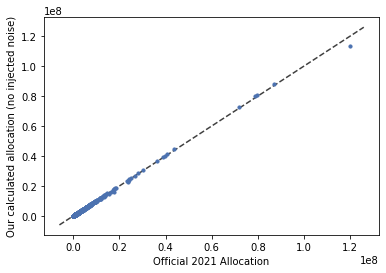

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
11              30           District of Columbia Public Schools   
6               14550             Fresno Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
11              30                           1.774410e+07   
6               14550                        2.120322e+07   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
11              30                                   4.229167e+06   
6               14550                                5.241393e+06   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
11              30                              1.444236e+07   
6               14550                           1.861120e+07   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
11              30                          1.405369e+07   
6               14550                       1.813083e+07   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
11              30                           5.046931e+07   
6               14550                        6.318665e+07   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
11              30                   1.774410e+07   
6               14550                2.379983e+07   
36              82047                8.712931e+07   
                82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
11              30                           3.806250e+06   
6               14550                        6.039204e+06   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
11              30                      1.371071e+07         1.360056e+07   
6               14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   

                             ... 

concentration
State level error State FIPS Code
1    -1.031982e+05
2     1.532362e+05
4    -4.704991e+04
5    -6.945534e+04
6     7.416133e+06
8     5.452464e+05
9     2.561204e+03
10   -9.032346e+03
11    0.000000e+00
12    2.110367e+04
13   -1.251088e+06
15   -2.445079e+05
16   -2.725803e+05
17   -6.104095e+05
18   -1.862363e+05
19   -1.156129e+05
20   -5.663436e+05
21    3.814588e+05
22   -5.767695e+05
23   -8.112665e+04
24    8.916371e+05
25   -6.597423e+04
26   -8.934615e+04
27   -2.672891e+05
28    3.031316e+04
29   -5.160864e+05
30   -1.146889e+05
31   -5.110908e+05
32    2.459451e+04
33    5.383305e+04
34   -8.487088e+04
35    2.022562e+04
36   -2.042560e+05
37    7.716090e+04
38    2.412615e+05
39   -1.277377e+06
40   -8.497416e+03
41   -2.422003e+05
42   -3.460752e+05
44    1.288993e+03
45   -2.985014e+05
46    7.944564e+04
47   -7.947481e+05
48   -6.371342e+05
49   -3.809568e+05
50    3.741965e+04
51   -3.068779e+05
53    7.793433e+05
54    2.185352e+05
55   -3.988313e+05
56

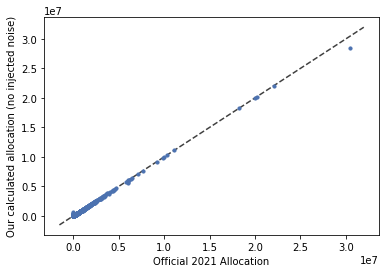

Name  \
State FIPS Code District ID                                         
6               22710         Los Angeles Unified School District   
2               180                     Anchorage School District   
31              72840                      Lincoln Public Schools   
6               14550              Fresno Unified School District   
                26370        Mount Diablo Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
2               180                          5.860881e+06   
31              72840                        4.067561e+06   
6               14550                        2.120322e+07   
                26370                        2.568170e+06   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
2               180                                  7.111514e+05   
31              72840                                5.409623e+05   
6               14550                                5.241393e+06   
                26370                                3.939596e+05   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
2               180                             5.032731e+06   
31              72840                           2.665058e+06   
6               14550                           1.861120e+07   
                26370                           1.511221e+06   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
2               180                         4.981777e+06   
31              72840                       3.202285e+06   
6               14550                       1.813083e+07   
                26370                       1.218204e+06   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
2               180                          1.658654e+07   
31              72840                        1.047587e+07   
6               14550                        6.318665e+07   
                26370                        5.691555e+06   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
2               180                  5.787300e+06   
31              72840                3.658026e+06   
6               14550                2.379983e+07   
                26370                3.140680e+06   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
2               180                          0.000000e+00   
31              72840                        0.000000e+00   
6               14550                        6.039204e+06   
                26370                        0.000000e+00   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
2               180                     5.104967e+06         5.093155e+06   
31              72840                   2.455668e+06         3.084438e+06   
6               14550                   2.182530e+07         2.159909e+07   
                26370                   2.023363e+06         1.644063e+06   

                           

targeted
State level error State FIPS Code
1    -4.787777e+05
2     1.802719e+06
4    -8.953752e+05
5    -1.690601e+05
6     2.259654e+07
8     1.590034e+06
9    -4.451385e+05
10    2.330651e+06
11    7.125924e+05
12   -3.053165e+06
13   -5.114339e+06
15   -6.039264e+04
16    2.111145e+06
17   -2.792120e+06
18   -8.515327e+05
19   -2.470060e+05
20   -1.654187e+06
21    8.905509e+05
22   -2.403236e+06
23    2.041546e+06
24    1.676828e+06
25   -1.177642e+06
26   -1.167662e+06
27   -9.432086e+05
28   -4.713010e+05
29   -1.547457e+06
30    1.818884e+06
31   -3.270169e+05
32   -6.882235e+05
33    9.804675e+05
34   -2.511082e+06
35   -3.505400e+05
36   -5.208670e+06
37   -1.601621e+06
38    2.368892e+06
39   -3.838304e+06
40   -2.892714e+05
41    5.339942e+05
42   -3.023665e+06
44    1.835316e+06
45   -1.424146e+06
46    1.755385e+06
47   -6.102017e+05
48   -6.302941e+06
49   -2.876029e+05
50    1.579062e+06
51   -1.760173e+06
53    3.582988e+06
54    5.643056e+05
55   -5.882917e+05
56    1

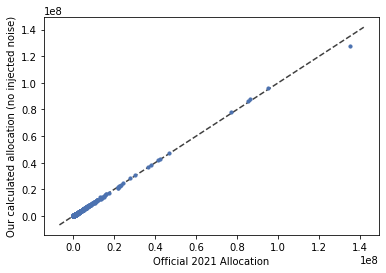

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   
17              9930          Chicago Public School District 299   
6               14550             Fresno Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   
17              9930                         7.911974e+07   
6               14550                        2.120322e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   
17              9930                                 1.955829e+07   
6               14550                                5.241393e+06   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   
17              9930                            8.232757e+07   
6               14550                           1.861120e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   
17              9930                        9.242648e+07   
6               14550                       1.813083e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   
17              9930                         2.734321e+08   
6               14550                        6.318665e+07   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
36              82047                8.712931e+07   
                82024                7.976208e+07   
17              9930                 7.885334e+07   
6               14550                2.379983e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   
17              9930                         2.000903e+07   
6               14550                        6.039204e+06   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   
17              9930                    8.518133e+07         9.596630e+07   
6               14550                   2.182530e+07         2.159909e+07   

                             ... 

In [7]:
# for validation purposes, instead of using the saipe numbers, let's use the department of education numbers
official_inputs = get_inputs(2021, use_official_children=True)

def compare_allocs(grant_type="total", **kwargs):
    allocs = funding(
        SonnenbergAuthorizer, official_inputs, GroundTruth(), sppe,
        allocator_kwargs=kwargs
    )
    print(
        "State level error",
        allocs[f"official_{grant_type}_alloc"].groupby("State FIPS Code").sum() -
        allocs[f"true_grant_{grant_type}"].groupby("State FIPS Code").sum()
    )
    if grant_type == "total":
        official = allocs[f"official_total_alloc"] - allocs[f"official_efig_alloc"]
    else:
        official = allocs[f"official_{grant_type}_alloc"]
    calculated = allocs[f"true_grant_{grant_type}"]
    allocs["error"] = official - calculated
    allocs["error_abs"] = allocs.error.abs()
    print("Average abs error", allocs.error_abs.mean())
    print(
        "RMSE", 
        np.sqrt(np.mean(np.power(allocs.error, 2))), 
        "(average alloc is", 
        np.mean(allocs[f"official_total_alloc"]), 
        ")"
    )

    ax = plt.gca()
    plt.scatter(official, calculated, s=10, rasterized=True)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    plt.xlabel("Official 2021 Allocation")
    plt.ylabel("Our calculated allocation (no injected noise)")
    plt.savefig(f"../plots/robustness/official_{grant_type}.pdf", transparent=True, dpi=300)
    plt.show()

    # plt.hist(allocs.error, bins=50)
    # plt.show()

    display(allocs.sort_values("error_abs", ascending=False).head(5))

for grant_type in ["total", "basic", "concentration", "targeted"]:
    print(grant_type)
    compare_allocs(grant_type=grant_type, state_minimum=True, hold_harmless=True)

## Adding data and privacy noise (at varying $\epsilon$)

### Baseline for policy experiments ($\epsilon = 0.1$)

In [2]:
# baseline used for policy experiments (eps = 0.1)
test_params(None, None, results=load_treatments("baseline", 'baseline'), print_results=[0.1], plot_results=False)

## est
## basic grants - eps=0.1 ##
# rows: 13190000
Max error: 60666588.98053066
-- RMSE --
RMSE: 346348.92517300055
Avg. RMSE 341107.24445569294
RMSE in exp. error: 13325.048446127472
-- Losses --
Avg. (per trial) # of districts losing $$: 6225.938
Avg. total losses: 484866110.3483961
Std. total losses: 12785927.666590018
Total exp losses: 18497285.58545162
SD in total. exp. losses 28817579.789959725
Average exp loss 2830.0620540776654
Total 5% quantile losses: 1993924968.2923515
Avg. 5% quantile loss: -159936.22910823385
-- Misalloc --
Avg. total abs misalloc: 969732220.6967921
Total exp abs misalloc: 36994571.17090309
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 24531496.706388947
Total exp misalloc to small districts: 12463074.464514138
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.495

official_basic_eligibles  \
trial delta epsilon State FIPS Code District ID                             
0     0.0   0.1     1               190                             673.0   
                                    5                               970.0   
                                    30                              708.0   
                                    60                              409.0   
                                    90                             1103.0   
...                                                                   ...   
999   0.0   0.1     56              4260                             29.0   
                                    6240                            151.0   
                                    5820                             12.0   
                                    4830                            125.0   
                                    6090                             14.0   

                                                 official_concentration_eligibles  \
trial delta epsilon State FIPS Code District ID                                     
0     0.0   0.1     1               190                                       0.0   
                                    5                                       970.0   
                                    30                                      708.0   
                                    60                                      409.0   
                                    90                                     1103.0   
...                                                                           ...   
999   0.0   0.1     56              4260                                      0.0   
                                    6240                                      0.0   
                                    5820                                      0.0   
                                    4830                                    125.0   
                                    6090                                      0.0   

                                                 official_targeted_eligibles  \
trial delta epsilon State FIPS Code District ID                                
0     0.0   0.1     1               190                                673.0   
                                    5                                  970.0   
                                    30                                 708.0   
                                    60                                 409.0   
                                    90                                1103.0   
...                                                                      ...   
999   0.0   0.1     56              4260                                 0.0   
                                    6240                               151.0   
                                    5820                                12.0   
                                    4830                               125.0   
                                    6090                                14.0   

                                                 true_pop_total  \
trial delta epsilon State FIPS Code District ID                   
0     0.0   0.1     1               190                 34669.0   
                                    5                   22051.0   
                                    30                  16920.0   
                                    60                   8842.0   
                                    90                  22043.0   
...                                                         ...   
999   0.0   0.1     56              4260                 3110.0   
                                    6240                 7135.0   
                                    5820                  670.0   
                                    4830                 5465.0   
                                    6090                 1462.0   

                            

### Other Epsilons

In [ ]:
# run a long computation to simulate 1000 trials for multiple epsilon values
!python scripts/laplace.py

In [9]:
# more epsilon values
# saves memory for printing/plotting large runs
prefixes = ["est", "dp", "dpest"]
results = pickle.load(open("../results/titlei_laplace.pkl", 'rb'))
results = results[[
    c for c in results.columns
    if any(
      p in c for p in prefixes + ["true"]
    )
]]

[0.1, 1.0, 2.52, 10.0, 30, 0.001, 0.0027825594022071257, 0.007742636826811269, 0.021544346900318832, 0.05994842503189409, 0.1668100537200059, 0.46415888336127775, 1.2915496650148828, 3.593813663804626, 10.0]
--- eps=0.01 ---


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


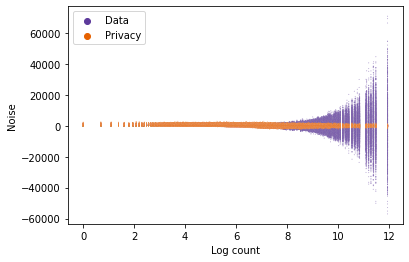

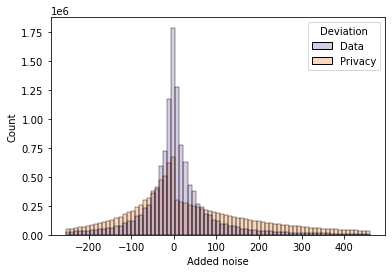

--- eps=0.1 ---


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


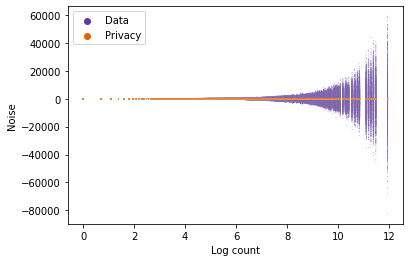

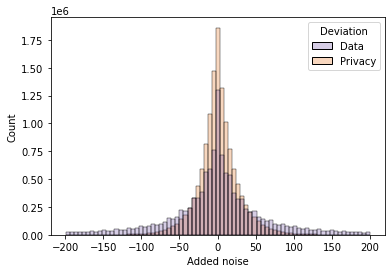

--- eps=1.0 ---


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


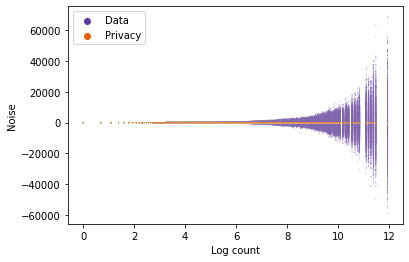

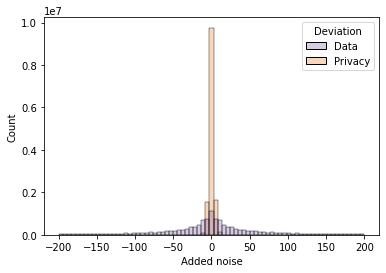

--- eps=10.0 ---


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


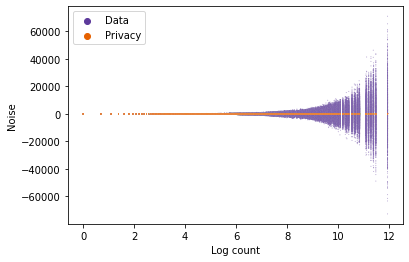

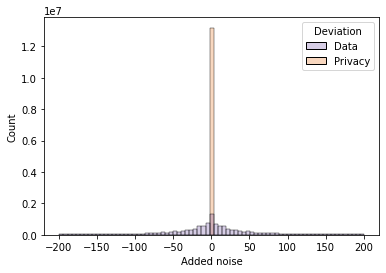

## est
## basic grants - eps=0.01 ##
# rows: 13190000
Max error: 54132299.00358689
-- RMSE --
RMSE: 342945.42811985355
Avg. RMSE 338133.20474114455
RMSE in exp. error: 11903.823522216742
-- Losses --
Avg. (per trial) # of districts losing $$: 6230.396
Avg. total losses: 484531125.80969566
Std. total losses: 12500574.69732078
Total exp losses: 18112131.037981838
SD in total. exp. losses 27380880.815006476
Average exp loss 2659.2469590341857
Total 5% quantile losses: 1992877282.4034066
Avg. 5% quantile loss: -159852.19238015614
-- Misalloc --
Avg. total abs misalloc: 969062251.6193911
Total exp abs misalloc: 36224262.07596351
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 23740270.24515053
Total exp misalloc to small districts: 12483991.83081298
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.495

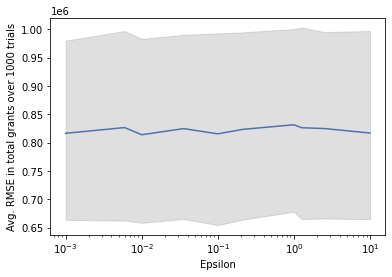

## dp
## basic grants - eps=0.01 ##
# rows: 13190000
Max error: 9929514.038344622
-- RMSE --
RMSE: 237380.28672332916
Avg. RMSE 237326.9719323144
RMSE in exp. error: 177987.7673748761
-- Losses --
Avg. (per trial) # of districts losing $$: 7131.995
Avg. total losses: 806880088.412635
Std. total losses: 8602595.358542664
Total exp losses: 385495938.67056227
SD in total. exp. losses 11915304.453970183
Average exp loss 92069.72502282356
Total 5% quantile losses: 2336269766.2793612
Avg. 5% quantile loss: -187396.30755429223
-- Misalloc --
Avg. total abs misalloc: 1613760176.82527
Total exp abs misalloc: 770991877.3411245
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 373597068.5847011
Total exp misalloc to small districts: 397394808.75642335
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.49502522


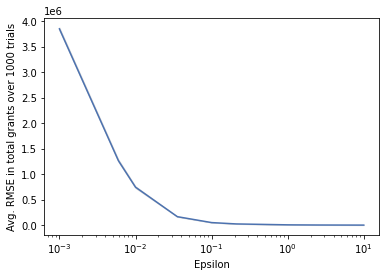

## dpest
## basic grants - eps=0.01 ##
# rows: 13190000
Max error: 48978716.078474276
-- RMSE --
RMSE: 393727.0553765022
Avg. RMSE 390175.07482087705
RMSE in exp. error: 168804.13585573243
-- Losses --
Avg. (per trial) # of districts losing $$: 6762.965
Avg. total losses: 980443136.332015
Std. total losses: 14555266.648821391
Total exp losses: 371905910.2080622
SD in total. exp. losses 38440584.68207659
Average exp loss 86995.53455159349
Total 5% quantile losses: 3176547278.4697647
Avg. 5% quantile loss: -254796.4448920963
-- Misalloc --
Avg. total abs misalloc: 1960886272.6640298
Total exp abs misalloc: 743811820.4161241
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 359431147.9665333
Total exp misalloc to small districts: 384380672.4495908
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.49502

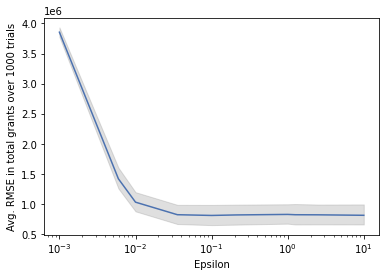

true_pop_total  \
trial delta epsilon  State FIPS Code District ID                   
0     0.0   0.010000 1               190                 34669.0   
                                     5                   22051.0   
                                     30                  16920.0   
                                     60                   8842.0   
                                     90                  22043.0   
...                                                          ...   
999   0.0   1.258925 56              4260                 3110.0   
                                     6240                 7135.0   
                                     5820                  670.0   
                                     4830                 5465.0   
                                     6090                 1462.0   

                                                  true_children_total  \
trial delta epsilon  State FIPS Code District ID                        
0     0.0   0.010000 1               190                       6710.0   
                                     5                         4131.0   
                                     30                        2575.0   
                                     60                        1465.0   
                                     90                        3065.0   
...                                                               ...   
999   0.0   1.258925 56              4260                       736.0   
                                     6240                      1295.0   
                                     5820                        90.0   
                                     4830                       816.0   
                                     6090                       249.0   

                                                  true_children_poverty  \
trial delta epsilon  State FIPS Code District ID                          
0     0.0   0.010000 1               190                          649.0   
                                     5                            957.0   
                                     30                           703.0   
                                     60                           406.0   
                                     90                          1057.0   
...                                                                 ...   
999   0.0   1.258925 56              4260                          28.0   
                                     6240                         148.0   
                                     5820                          12.0   
                                     4830                         108.0   
                                     6090                          12.0   

                                                  est_pop_total  \
trial delta epsilon  State FIPS Code District ID                  
0     0.0   0.010000 1               190                34669.0   
                                     5                  22051.0   
                                     30                 16920.0   
                                     60                  8842.0   
                                     90                 22043.0   
...                                                         ...   
999   0.0   1.258925 56              4260                3110.0   
                                     6240                7135.0   
                                     5820                 670.0   
                                     4830                5465.0   
                                     6090                1462.0   

                                                  est_children_total  \
trial delta epsilon  State FIPS Code District ID                       
0     0.0   0.010000 1               190                      6710.0   
                                     5                        4131.0   
                                     30                       2575.0   
       

In [12]:
print([0.1, 1.0, 2.52, 10.0, 30]+list(np.logspace(-3, 1, num=10)))
# test_params(None, None, results=results, print_results=[0.01, 0.1, 1.0, 10.0, 30.0], plot_results=True)
test_params(None, None, results=results, print_results=[0.01, 0.1, 1.0, 10.0], plot_results=True)

### Varying total children as well
By default, we only vary the number of children in poverty (we only have variance estimates for this quantity). What if we also varied the total number of children, using the same variance estimates but proportionally scaled?

--- eps=0.1 ---


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


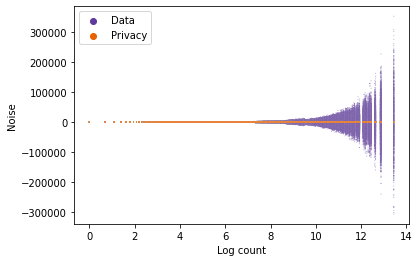

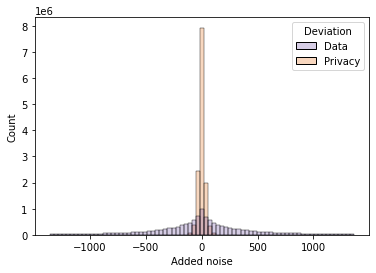

## est
## basic grants - eps=0.1 ##
# rows: 13190000
Max error: 54427185.89708812
-- RMSE --
RMSE: 345639.126798006
Avg. RMSE 340424.1439440428
RMSE in exp. error: 13319.032154392607
-- Losses --
Avg. (per trial) # of districts losing $$: 6232.221
Avg. total losses: 485838642.3074932
Std. total losses: 13052629.858172888
Total exp losses: 19458613.979119625
SD in total. exp. losses 31299080.831198815
Average exp loss 2871.6962779102164
Total 5% quantile losses: 1997407182.746067
Avg. 5% quantile loss: -160215.5436549344
-- Misalloc --
Avg. total abs misalloc: 971677284.6149863
Total exp abs misalloc: 38917227.958239086
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 25773819.998511903
Total exp misalloc to small districts: 13143407.959727181
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.495025

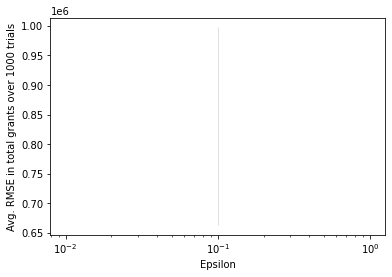

## dp
## basic grants - eps=0.1 ##
# rows: 13190000
Max error: 453655.0836674436
-- RMSE --
RMSE: 21633.46261477815
Avg. RMSE 21631.21105087261
RMSE in exp. error: 5791.97095705034
-- Losses --
Avg. (per trial) # of districts losing $$: 6560.683
Avg. total losses: 96518112.97989663
Std. total losses: 980980.4098558878
Total exp losses: 14780670.179012172
SD in total. exp. losses 1850496.667353825
Average exp loss 2106.1086034500104
Total 5% quantile losses: 415109560.96089673
Avg. 5% quantile loss: -33296.66808060453
-- Misalloc --
Avg. total abs misalloc: 193036225.95979312
Total exp abs misalloc: 29561340.358024187
-- Other stats --
# small districts: 9744
Total exp misalloc to large districts: 12025658.114972852
Total exp misalloc to small districts: 17535682.243051335
Total true alloc: 6187424926.528488
Total true alloc per child eligible 726.209178072464
Average true alloc: 469099.6911697112
Average true alloc per child eligible 717.5120036339415
Max true alloc: 115755955.49502522

official_basic_eligibles  \
trial delta epsilon State FIPS Code District ID                             
0     0.0   0.1     1               190                             673.0   
                                    5                               970.0   
                                    30                              708.0   
                                    60                              409.0   
                                    90                             1103.0   
...                                                                   ...   
999   0.0   0.1     56              4260                             29.0   
                                    6240                            151.0   
                                    5820                             12.0   
                                    4830                            125.0   
                                    6090                             14.0   

                                                 official_concentration_eligibles  \
trial delta epsilon State FIPS Code District ID                                     
0     0.0   0.1     1               190                                       0.0   
                                    5                                       970.0   
                                    30                                      708.0   
                                    60                                      409.0   
                                    90                                     1103.0   
...                                                                           ...   
999   0.0   0.1     56              4260                                      0.0   
                                    6240                                      0.0   
                                    5820                                      0.0   
                                    4830                                    125.0   
                                    6090                                      0.0   

                                                 official_targeted_eligibles  \
trial delta epsilon State FIPS Code District ID                                
0     0.0   0.1     1               190                                673.0   
                                    5                                  970.0   
                                    30                                 708.0   
                                    60                                 409.0   
                                    90                                1103.0   
...                                                                      ...   
999   0.0   0.1     56              4260                                 0.0   
                                    6240                               151.0   
                                    5820                                12.0   
                                    4830                               125.0   
                                    6090                                14.0   

                                                 true_pop_total  \
trial delta epsilon State FIPS Code District ID                   
0     0.0   0.1     1               190                 34669.0   
                                    5                   22051.0   
                                    30                  16920.0   
                                    60                   8842.0   
                                    90                  22043.0   
...                                                         ...   
999   0.0   0.1     56              4260                 3110.0   
                                    6240                 7135.0   
                                    5820                  670.0   
                                    4830                 5465.0   
                                    6090                 1462.0   

                            

In [2]:
# now, testing when total # children is also varied
results = load_treatments("vary_total_children", 'Total number of children varies')
test_params(None, None, results=results, print_results=[0.1], plot_results=True, noise_to_plot="children_total")

## Visualizing the impacts of uncertainty

Adapted from `plot_sampling.ipynb`.

In [2]:
eps = [0.001, 0.01, 0.1, 1.0, 10]
num_trials = 100
num_bins = 10

In [ ]:
laplace = test_params(saipe, Laplace, eps=[0.001, 0.01, 0.1, 1.0, 10], delta=[0.0], trials=num_trials, print_results=False, plot_results=False)
pickle.dump(laplace, open("../results/bootstrap/laplace.pkl", 'wb'))

In [ ]:
baseline = load_treatments('baseline', 'baseline')
laplace = pickle.load(open("../results/bootstrap/laplace.pkl", 'rb'))

In [ ]:
treatments = {
  "+ Laplace mech. (ε={})".format(e): laplace.loc[pd.IndexSlice[:, 0.0, e, :, :], :].copy()
  for e in eps
}
treatments["Data error"] = baseline

plot_treatments(
  treatments,
  lambda df: df.groupby('trial')["lost_eligibility"].sum(),
  plt.hist,
  dict(bins=num_bins, alpha=0.5),
  filename="ineligible_hist",
  xlab="# districts wrongly ineligible",
  ylab="Trials"
)

for grant in [
  "basic",
  "concentration",
  "targeted",
  "total"
]:
  plot_treatments(
    treatments,
    lambda df: df.groupby(['State FIPS Code', 'District ID'])["lost_eligibility"].mean(),
    sns.kdeplot,
    dict(bw_method=0.5, fill=True),
    filename=f"likelihood_ineligible_{grant}",
    xlab=f"Likelihood of losing eligibility ({grant})",
    grant=grant,
    mean_line=True
  )

  plot_treatments(
    treatments,
    lambda df: np.sqrt(df.groupby('trial')["misalloc_sq"].mean()),
    sns.kdeplot,
    dict(bw_method=0.5, fill=True),
    filename=f"rmse_{grant}",
    xlab=f"RMSE for {grant} (per trial)",
    mean_line=True
  )

  plot_treatments(
    treatments,
    lambda df: \
      np.sign(df.groupby(['State FIPS Code', 'District ID'])["misalloc"].mean())*np.power(
        np.abs(df.groupby(['State FIPS Code', 'District ID'])["misalloc"].mean()), 1/3),
    sns.kdeplot,
    dict(bw_method=0.5, fill=True),
    filename=f"misalloc_{grant}",
    xlab=f"Misallocations, {grant} (cube root)",
    mean_line=True
  )

## Demographic distribution of impacts

In [2]:
eps = 0.1

results = load_treatments("baseline")['baseline'].loc[pd.IndexSlice[:, 0.0, eps, :, :], :]
print(results.shape)

(13190000, 38)


### Summary Stats

In [9]:
grants = discrimination_join(results, save_path=f"../results/baseline_eps={eps}", verbose=True)

[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices
(13294, 257)
(13293, 341)
(13294, 203)
(13294, 495)
['Total population (RACE) - est', 'White (RACE) - pct', 'Black or African American (RACE) - pct', 'Cherokee tribal grouping (RACE) - pct', 'Chippewa tribal grouping (RACE) - pct', 'Navajo tribal grouping (RACE) - pct', 'Sioux tribal grouping (RACE) - pct', 'Asian (RACE) - pct', 'Asian Indian (RACE) - pct', 'Chinese (RACE) - pct', 'Filipino (RACE) - pct', 'Japanese (RACE) - pct', 'Korean (RACE) - pct', 'Vietnamese (RACE) - pct', 'Other Asian (RACE) - pct', 'Native Hawaiian (RACE) - pct', 'Guamanian or Chamorro (RACE) - pct', 'Samoan (RACE) - pct', 'Some other race (RACE) - pct', 'Two or more races (RACE) - pct', 'Mexican (HISPANIC OR LATINO AND RACE) - pct', 'Puerto Rican (HISPANIC OR LATINO AND RACE) - pct', 'Cuban (HISPANIC OR LATINO AND RACE) - pct', 'Othe

### Geography

13190000


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(


<AxesSubplot:>

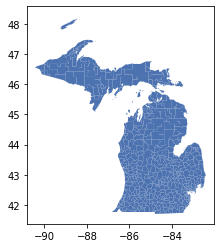

In [3]:
print(len(results))
joined = geo_join(results)
joined.loc[26].plot()

In [5]:
## AVERAGE ERROR
dperr = cube(joined.loc[[
    f for f in joined.index.get_level_values("State FIPS Code").unique()
    if f not in [2, 15]
]]["error_dp_per_child_eligible"])
dpmin = dperr.min()
dpmax = dperr.max()
serr = cube(joined.loc[[
    f for f in joined.index.get_level_values("State FIPS Code").unique()
    if f not in [2, 15]
]]["error_per_child_eligible"])
smin = serr.min()
smax = serr.max()
ymin = smin if smin <= dpmin else dpmin
ymax = smax if smax >= dpmax else dpmax

heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    label="Expected misallocation per eligible child (cube root)",
    y="error_dp_per_child_eligible",
    file="misalloc_nation.pdf",
    figsize=(15,10),
    bar_location = 'right'
    # min=ymin,
    # max=ymax
)
heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    y="error_per_child_eligible",
    label="Expected misallocation per eligible child (cube root)",
    file="misalloc_nation_sampling.pdf",
    figsize=(15,10),
    bar_location = 'right',
    min=ymin,
    max=ymax
)
heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    y="dp_marginal",
    label="Expected misallocation per eligible child (cube root)",
    file="misalloc_nation_marginal.pdf",
    figsize=(15,10),
    bar_location = 'right'
)

All but 3967 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 13.741804639797138
All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 5280 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 13.741804639797138


In [6]:
## WORST-CASE ERROR
dperr = cube(joined.loc[[
    f for f in joined.index.get_level_values("State FIPS Code").unique()
    if f not in [2, 15]
]]["error_dp_per_child_eligible_percentile_5.0"])
dpmin = dperr.min()
dpmax = dperr.max()
serr = cube(joined.loc[[
    f for f in joined.index.get_level_values("State FIPS Code").unique()
    if f not in [2, 15]
]]["error_per_child_eligible_percentile_5.0"])
smin = serr.min()
smax = serr.max()
ymin = smin if smin <= dpmin else dpmin
ymax = smax if smax >= dpmax else dpmax

heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    label="5% quantile misallocation per eligible child (cube root)",
    y="error_dp_per_child_eligible_percentile_5.0",
    file="misalloc_nation_worst.pdf",
    figsize=(15,10),
    bar_location = 'right',
    alpha=None,
    vcenter=None,
    theme="YlOrRd_r"
    # min=ymin,
    # max=ymax
)
heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    y="error_per_child_eligible_percentile_5.0",
    label="5% quantile misallocation per eligible child (cube root)",
    file="misalloc_nation_sampling_worst.pdf",
    figsize=(15,10),
    bar_location = 'right',
    alpha=None,
    min=ymin,
    max=ymax,
    vcenter=None,
    theme="YlOrRd_r"
)
heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    y="dp_marginal_percentile_5.0",
    label="5% quantile misallocation per eligible child (cube root)",
    file="misalloc_nation_marginal_worst.pdf",
    figsize=(15,10),
    alpha=None,
    bar_location = 'right',
    vcenter=None,
    theme="YlOrRd_r"
)

All but 3 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 0.0


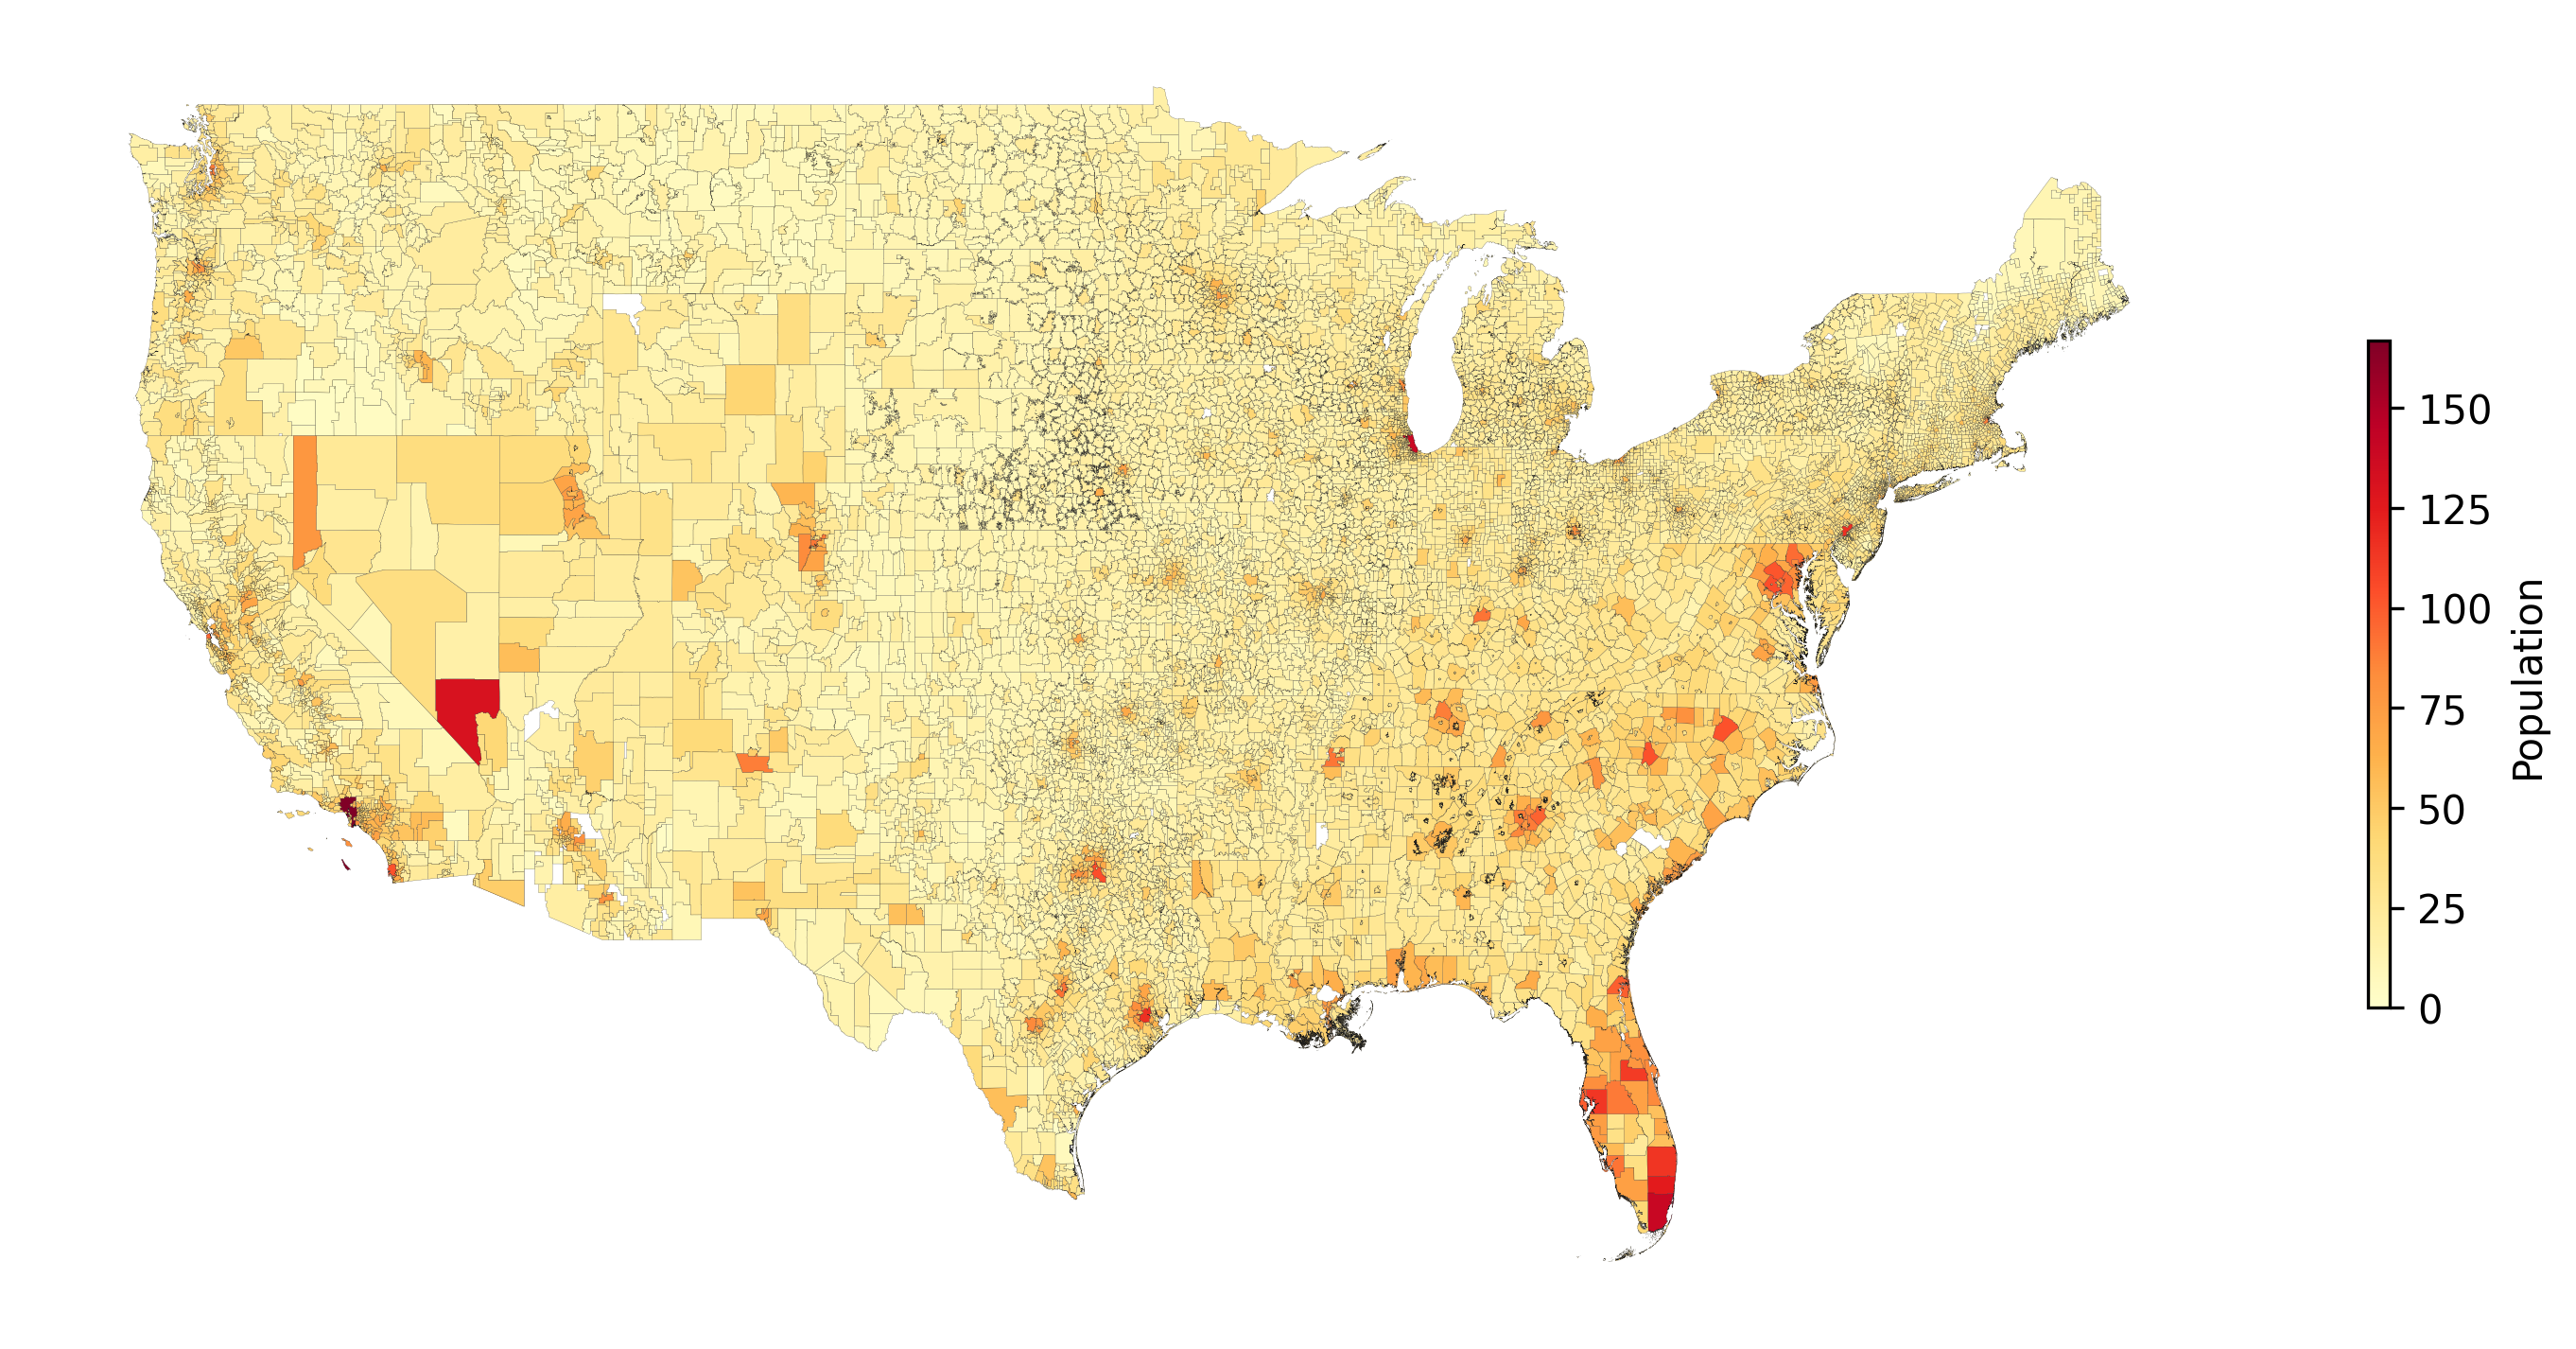

In [6]:
heatmap(
    joined.loc[[
        f for f in joined.index.get_level_values("State FIPS Code").unique()
        if f not in [2, 15]
    ]],
    "Population",
    vcenter=None,
    y="true_pop_total",
    theme="YlOrRd"
)

In [9]:
acs = get_acs_unified()
joined_acs = joined.join(acs['White (RACE) - pct'], how="left")
joined_acs["prop_nonwhite"] = 1 - pd.to_numeric(joined_acs['White (RACE) - pct'], errors='coerce') / 100
joined_acs.prop_nonwhite.describe()
for state in [
#     (26, "Michigan"),
#     (37, "North Carolina"),
    # (72, "Puerto Rico"),
    (42, "Pennsylvania")
]:
    # heatmap(joined_acs.loc[state[0]], "Prop. non-white-only", y="prop_nonwhite", transform=None, vcenter=None, theme="Blues")
    # heatmap(joined.loc[state[0]], "% switched eligibility for any grant", y="switched_eligibility", transform=None, vcenter=None, theme="Oranges")
    heatmap(
        joined.loc[state[0]], 
        "Likelihood of becoming wrongly ineligible for any grant", 
        file="ineligible.pdf",
        y="became_ineligible", 
        transform=None, 
        vcenter=None, 
        theme="Oranges",
        min=0
    )
    heatmap(
        joined.loc[state[0]], 
        "Likelihood of becoming wrongly ineligible for any grant", 
        file="ineligible_dp.pdf",
        y="became_ineligible_dp", 
        transform=None, 
        vcenter=None, 
        theme="Oranges",
        min=0
    )
    heatmap(
        joined.loc[state[0]], 
        "Likelihood of becoming wrongly eligible for any grant", 
        file="eligible.pdf",
        y="became_eligible", transform=None, vcenter=None, theme="Greens",
        min=0
    )
    heatmap(
        joined.loc[state[0]], 
        "Likelihood of becoming wrongly eligible for any grant", 
        file="eligible_dp.pdf",
        y="became_eligible_dp", transform=None, vcenter=None, theme="Greens",
        min=0
    )
    # heatmap(joined.loc[state[0]], f"Misallocation per child in {state[1]} (cube root)")
    # heatmap(joined.loc[state[0]], f"Misallocation per eligible child in {state[1]} (cube root)", y="error_per_child_eligible")
    # heatmap(joined.loc[state[0]], "Log eligible children", y="true_children_eligible", transform='log', vcenter=None, theme="Purples")
    # heatmap(joined.loc[state[0]], "% eligible children", y="percent_eligible", transform=None, vcenter=None, theme="Purples")
    # heatmap(joined.loc[state[0]], "Log population", y="true_pop_total", transform='log', vcenter=None, theme="Greens")
    # heatmap(joined.loc[state[0]], "Log status quo entitlement", y="true_grant_total", transform='log', vcenter=None, theme="Greens")

[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices
[INFO] Successfully imputed 1573 new indices


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


All but 32 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 0.02601996449238452


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


All but 27 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 0.026019600197216913


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

All but 283 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 0.026017882737008387


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


All but 271 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 0.02601996449238454


## [DEPRECATED] Gaussian mechanism (approx. DP)

Add Gaussian noise ln(1/delta)/epsilon for better accuracy bound.

/opt/miniconda3/envs/dp-acs/lib/python3.9/site-packages/diffprivlib/mechanisms/gaussian.py:161: RuntimeWarning: overflow encountered in exp
  return phi(np.sqrt(epsilon * val)) - np.exp(epsilon) * phi(- np.sqrt(epsilon * (val + 2))) - delta
/opt/miniconda3/envs/dp-acs/lib/python3.9/site-packages/diffprivlib/mechanisms/gaussian.py:161: RuntimeWarning: invalid value encountered in double_scalars
  return phi(np.sqrt(epsilon * val)) - np.exp(epsilon) * phi(- np.sqrt(epsilon * (val + 2))) - delta
/opt/miniconda3/envs/dp-acs/lib/python3.9/site-packages/diffprivlib/mechanisms/gaussian.py:164: RuntimeWarning: overflow encountered in exp
  return phi(- np.sqrt(epsilon * val)) - np.exp(epsilon) * phi(- np.sqrt(epsilon * (val + 2))) - delta
/opt/miniconda3/envs/dp-acs/lib/python3.9/site-packages/diffprivlib/mechanisms/gaussian.py:164: RuntimeWarning: invalid value encountered in double_scalars
  return phi(- np.sqrt(epsilon * val)) - np.exp(epsilon) * phi(- np.sqrt(epsilon * (val + 2))) - delta


(0.001, 0.027825594022071243, 0.774263682681127, 2.52, 21.54434690031882, 599.4842503189409, 16681.005372000593, 464158.8833612772, 12915496.650148828, 359381366.3804626, 10000000000.0)
## dp
## basic grants ##
RMSE at eps=2.52: 21399.19796113853
RMSE prop eps=2.52: 0.004691125745169814
Total misalloc at eps=2.52: 1857499037.3476112
Total true alloc: 398753867558.1087
## concentration grants ##
RMSE at eps=2.52: 100671.3283797714
RMSE prop eps=2.52: 0.006430091290918551
Total misalloc at eps=2.52: 1869504093.5586305
Total true alloc: 294198199337.48425
## targeted grants ##
RMSE at eps=2.52: 56692.94880990919
RMSE prop eps=2.52: 0.004404833980625078
Total misalloc at eps=2.52: 2903765215.9326797
Total true alloc: 667259095030.0739
## total grants ##
RMSE at eps=2.52: 15266.238953544133
RMSE prop eps=2.52: 0.00492429570329448
Total misalloc at eps=2.52: 787839065.3432262
Total true alloc: 159990202216.03195


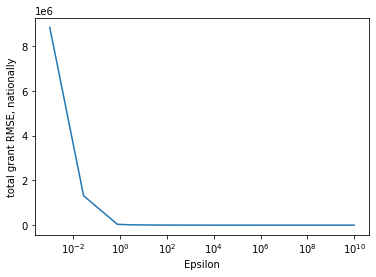

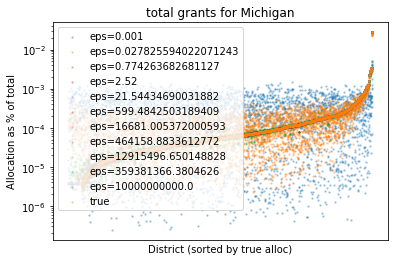

/Users/steed/dp-acs/dp_policy/api.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alloc['err_prop'] = (


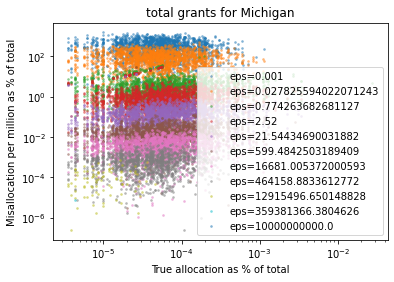

## dpest
## basic grants ##
RMSE at eps=2.52: 2730892.7708471036
RMSE prop eps=2.52: 0.1605220789051688
Total misalloc at eps=2.52: 64100091418.47471
Total true alloc: 398753867558.1087
## concentration grants ##
RMSE at eps=2.52: 3115379.4280794035
RMSE prop eps=2.52: 0.2559038715010952
Total misalloc at eps=2.52: 75780426908.8416
Total true alloc: 294198199337.48425
## targeted grants ##
RMSE at eps=2.52: 7905797.344754197
RMSE prop eps=2.52: 0.20086854941523397
Total misalloc at eps=2.52: 136090233079.47676
Total true alloc: 667259095030.0739
## total grants ##
RMSE at eps=2.52: 1550976.8201538778
RMSE prop eps=2.52: 0.20096552176913365
Total misalloc at eps=2.52: 32152514466.29373
Total true alloc: 159990202216.03195


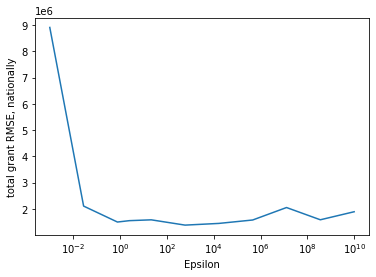

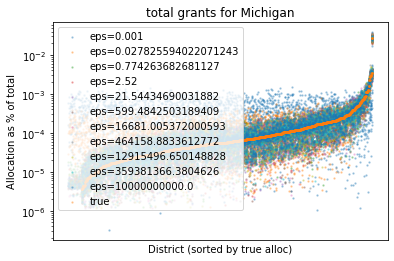

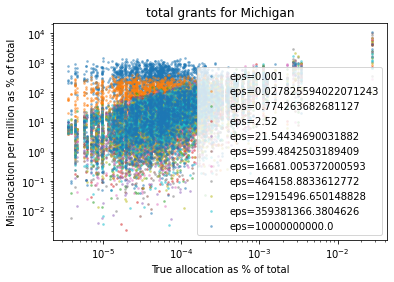

In [18]:
from dp_policy.titlei.mechanisms import Gaussian

# with delta = 0
results = test_params(
    saipe,
    Gaussian, 
    delta=list(np.linspace(1e-8, 1e-5, endpoint=False, num=10)),
    auth=False
)

Comparing dp


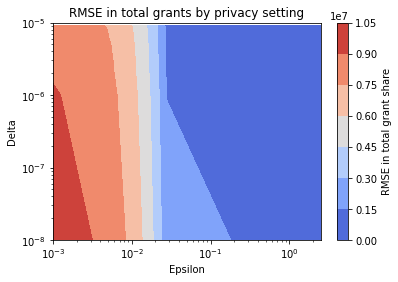

Comparing dpest


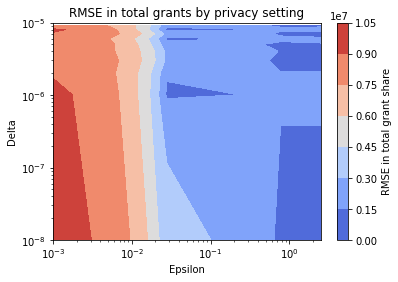

In [25]:
for prefix in ('dp', 'dpest'):
    print("Comparing", prefix)

    grant_type = 'total'

    eps = list(results.index.get_level_values("epsilon").unique())

    delts = list(results.index.get_level_values("delta").unique())
    mse = np.zeros((len(eps), len(delts)))
    for params, alloc in results.groupby(["epsilon", "delta"]):
        
        e, d = params
        error = alloc[f"true_grant_{grant_type}"] \
            - alloc[f"{prefix}_grant_{grant_type}"]
        mse[eps.index(e), delts.index(d)] = np.sqrt(sum(error**2)/alloc.shape[0])
        
    plt.contourf(eps, delts, mse.transpose(), cmap="coolwarm")
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5])
    # ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    plt.xlim(None, 2.5)
    plt.xlabel("Epsilon")
    plt.ylabel("Delta")
    plt.title("RMSE in total grants by privacy setting")
    plt.colorbar(label="RMSE in total grant share")
    plt.show()